# Curso Analise e Desenvolvimento de Sistema.
### Topicos de Big Data em Python
### Campus: Estacio de Sá Conceição - Professor(a) Fabio Oliveira
### Aluno: BRUNO DE OLIVEIRA SOARES - RA: 202003391336 - Turno: Nortuno
### Aluno: JULIANO CARLOS MANCINI - RA: 202002436281 - Turno: Noturno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Daily Demand Forecasting Orders(Ordens de Previsão de Demanda Diária)

### O banco de dados foi coletado durante 60 dias, este é um banco de dados real de uma empresa brasileira de grande logística. Doze atributos preditivos e um alvo que é o total de pedidos diários.


In [3]:
df = pd.read_csv("Daily_Demand_Forecasting_Orders.csv", sep = ";")

## Dicionário das Colunas

Aqui está um dicionário que inclui o nome original, o tipo de dado e a descrição de cada coluna:

| Nome Original                                     | Nome da Coluna                                   | Tipo do dado  | Descrição                                               |
|--------------------------------------------------|--------------------------------------------------|-------|---------------------------------------------------------|
| Week of the month (first week, second, third, fourth or fifth week) | Semana do mês (primeira semana, segunda, terceira, quarta ou quinta semana) | int | Refere-se à semana específica do mês (primeira, segunda, terceira, quarta ou quinta semana) |
| Day of the week (Monday to Friday)                | Dia da semana (segunda-feira a sexta-feira)      | int | Representa o dia da semana (segunda-feira a sexta-feira) |
| Non-urgent order                                  | Pedido não urgente                               | float | Indica a presença de um pedido que não é urgente         |
| Urgent order                                      | Pedido urgente                                    | float | Indica a presença de um pedido urgente                   |
| Order type A                                      | Tipo de pedido A                                 | float | Representa o tipo de pedido A                            |
| Order type B                                      | Tipo de pedido B                                 | float | Representa o tipo de pedido B                            |
| Order type C                                      | Tipo de pedido C                                 | float | Representa o tipo de pedido C                            |
| Fiscal sector orders                              | Pedidos do setor fiscal                           | float | Indica os pedidos provenientes do setor fiscal           |
| Orders from the traffic controller sector         | Pedidos do setor de controlador de tráfego        | int | Indica os pedidos provenientes do setor de controlador de tráfego |
| Banking orders (1)                                | Pedidos bancários (1)                            | int | Representa um tipo de pedido bancário (1)                |
| Banking orders (2)                                | Pedidos bancários (2)                            | int | Representa um tipo de pedido bancário (2)                |
| Banking orders (3)                                | Pedidos bancários (3)                            | int | Representa um tipo de pedido bancário (3)                |
| Target (Total orders)                             | Meta (Total de pedidos)                          | float | Representa a meta de total de pedidos                    |


### Comando **Head(15)** para exibir apenas as 15 primeiras linhas, tornando o DataFrame mais visivel para o começo da analise exploratoria.

In [4]:
df.head(15)

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


### Comando Describe() para nos trazer dados Estatisticos descritivos do nosso DataFrame.

In [5]:
df.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


Uma breve interpretação geral das estatisticas descritivas usadas no comando describe().

1. **count**: O número de entradas não nulas para cada coluna.
2. **mean**: A média (média aritmética) dos valores em cada coluna.
3. **std**: O desvio padrão, que mede a dispersão dos valores em relação à média.
4. **min**: O valor mínimo encontrado em cada coluna.
5. **25%**: O primeiro quartil, que representa o valor abaixo do qual 25% dos dados estão.
6. **50%**: O segundo quartil (mediana), que representa o valor abaixo do qual 50% dos dados estão.
7. **75%**: O terceiro quartil, que representa o valor abaixo do qual 75% dos dados estão.
8. **max**: O valor máximo encontrado em cada coluna.




### O box plot exibe estatísticas resumidas, como a mediana (linha dentro da caixa), com eles visualizamos a dispersão e a tendência central dos dados.

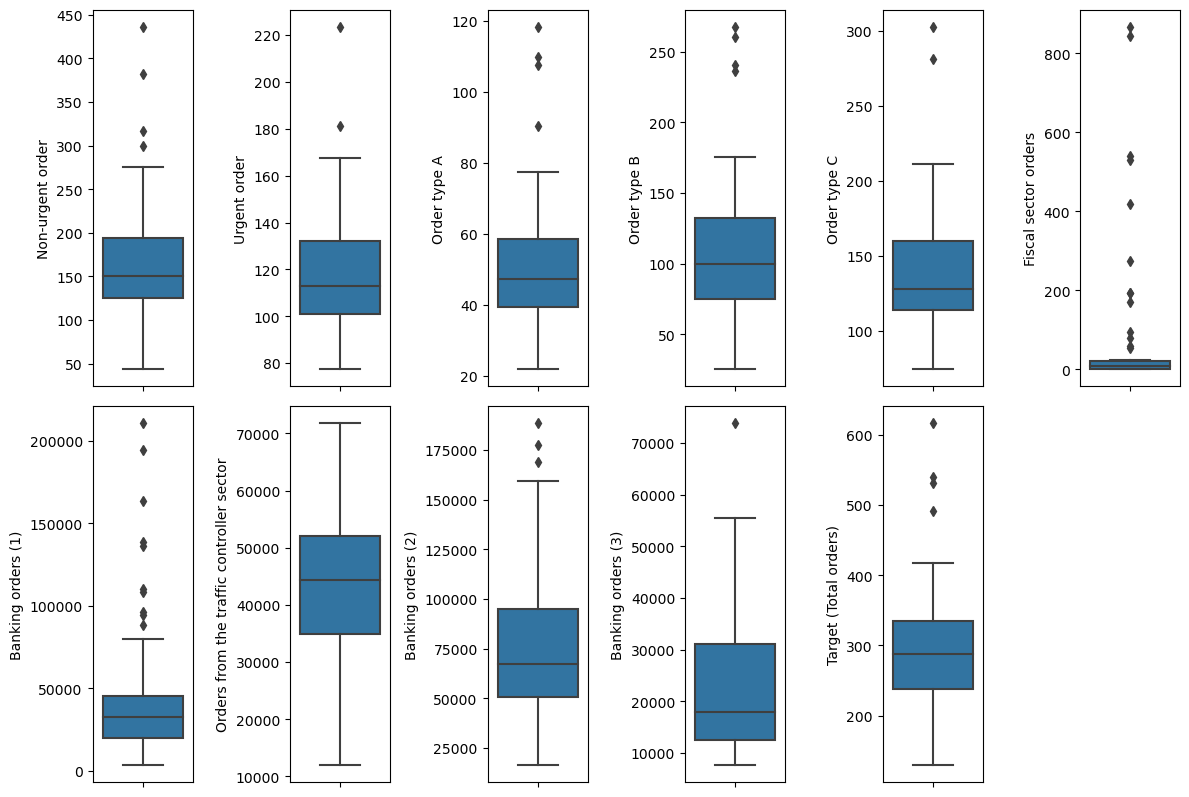

In [6]:
# Box plots
f, axes = plt.subplots(3, 6, figsize=(12, 12))

axes = axes.flatten()
columns = ['Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C',
           'Fiscal sector orders', 'Banking orders (1)', 'Orders from the traffic controller sector',
           'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']

for col, ax in zip(columns, axes):
    sns.boxplot(y=col, data=df, ax=ax)

for i in range(len(columns), len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()

plt.show()


O gráfico apresenta box plots para várias variáveis do conjunto de dados. Em um box plot, a caixa representa o intervalo interquartil (IQR), a linha no meio é a mediana, e os pontos fora da caixa são valores discrepantes. Aqui está uma interpretação rápida:

Non-urgent order e Urgent order:

A maioria dos pedidos não urgentes está concentrada em uma faixa mais estreita, enquanto os pedidos urgentes têm uma distribuição um pouco mais ampla. Ambos têm alguns valores discrepantes superiores.
Order type A, B e C:

O tipo de pedido B tem uma variação mais ampla, com alguns valores discrepantes inferiores. Os tipos A e C têm distribuições mais concentradas, com alguns valores discrepantes superiores.
Fiscal sector orders, Orders from the traffic controller sector, e Banking orders (1, 2, 3):

Esses setores específicos mostram diferentes padrões de distribuição. O setor bancário (Banking orders) tem uma variação notável em alguns dos subsets.
Target (Total orders):

A distribuição total de pedidos tem alguns valores discrepantes inferiores, indicando uma variação mais ampla nos dados.
Os box plots são úteis para entender a variabilidade e distribuição dos dados em diferentes variáveis do conjunto de dados.



# Entendendo o comportamento dos pedidos diarios e semanais.

Análise por Tipo de Pedido para entender e responder as perguntas abaixo.

1. Qual o tipo de pedido mais solicitado?
2. Qual o tipo de pedido menos solicitado?

O gráfico abaixo representa a evolução temporal dos pedidos ao longo das semanas do mês para cada tipo de pedido. Cada linha no gráfico corresponde a um tipo de pedido específico (A, B, ou C).

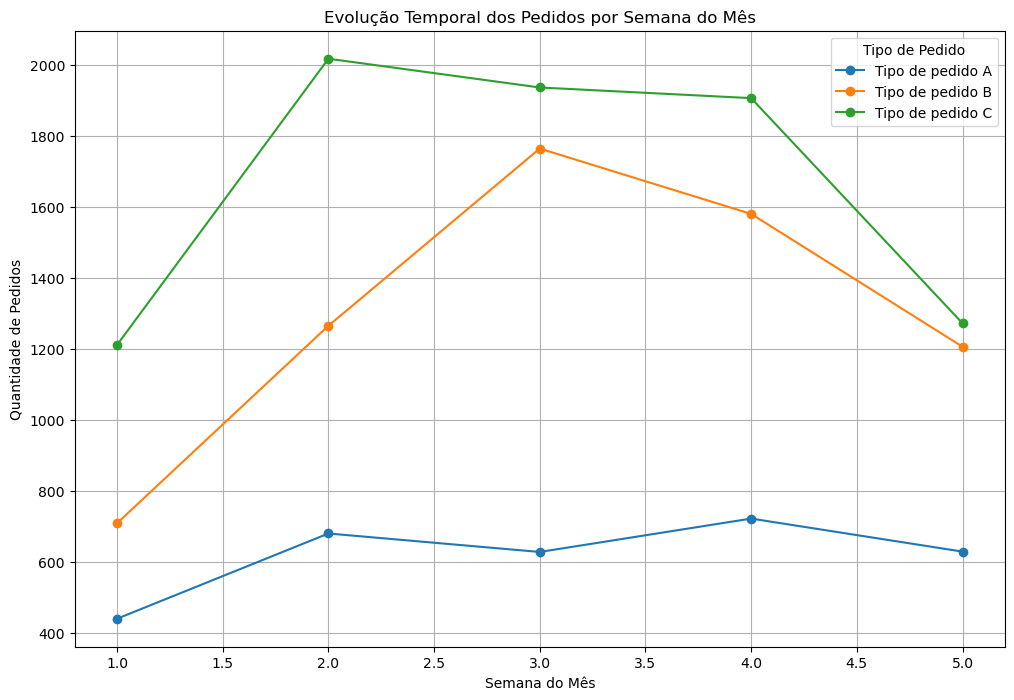

In [7]:
# Convertendo as colunas 'Order type A', 'Order type B', 'Order type C' para inteiros
df2 = df.copy() #cópia do data frame
df[['Order type A', 'Order type B', 'Order type C']] = df[['Order type A', 'Order type B', 'Order type C']].astype(int)

# Agrupando por semana do mês e somando os pedidos de cada tipo
pedidos_por_semana = df.groupby('Week of the month (first week, second, third, fourth or fifth week')[['Order type A', 'Order type B', 'Order type C']].sum()

# Definindo manualmente os números do índice
numeros_do_indice = [1, 2, 3, 4, 5]

# Atribuindo os números do índice ao DataFrame
pedidos_por_semana.index = numeros_do_indice

# Criando um novo DataFrame com o índice definido manualmente
df_plot = pd.DataFrame(pedidos_por_semana.values, columns=['Tipo de pedido A', 'Tipo de pedido B', 'Tipo de pedido C'], index=pedidos_por_semana.index)

# Plotando o gráfico de linha temporal
df_plot.plot(kind='line', figsize=(12, 8), marker='o')  # Adicionando marcadores para destacar os pontos
plt.title('Evolução Temporal dos Pedidos por Semana do Mês')
plt.xlabel('Semana do Mês')
plt.ylabel('Quantidade de Pedidos')
plt.legend(title='Tipo de Pedido')
plt.grid(True)
plt.show()

### Entendo o grafico

O grafico de linha acima está identificando um crescimento ate a teceira semana, conforme se aproxima do termino do mes, as ordens de pedidos caem consideravelmente.

O pedido C contem um pico ate a segunda semana, porem vemos uma queda no inicio da quarta semana. O pedido B cresce entre a primeira e terceira semana, em seguida há um declinio ate a quinta semana. 

O pedido A mesmo sendo em menor numero se mantem constante com altos e baixos, crescimento ate segunda semana, com queda entre a segunda e terceira e novamente cresce ate a quarta semana e por fim cai igualmente aos demais pedidos conforme se aproxima do fim do mês.

Sendo assim respondemos nossas perguntas. 

1. Qual o tipo de pedido mais solicitado?
Resposta: O pedido mais solicitado é o tipo C.

2. Qual o tipo de pedido menos solicitado?
Resposta: O pedido menos solicitado é o tipo A.


## Analisaremos o total de pedidos por dia da semana e obter um grafico para visualizar.

O gráfico de barras abaixo ilustra o total de pedidos para cada dia da semana ao longo do período analisado. Cada barra representa a quantidade acumulada de pedidos para um dia específico da semana, sendo o eixo horizontal os dias da semana e o eixo vertical o total de pedidos. A barra azul oferece uma representação visual clara da variação diária no volume de pedidos.

A análise desse gráfico pode revelar padrões ou tendências específicas relacionadas à demanda ao longo da semana. Observar as flutuações nos totais de pedidos em diferentes dias pode ser crucial para estratégias logísticas, alocação de recursos e tomada de decisões operacionais.

As informações sobre os dias da semana estão dispostas no eixo horizontal, enquanto o total de pedidos está representado pela altura de cada barra. A grade no gráfico auxilia na leitura precisa dos valores.

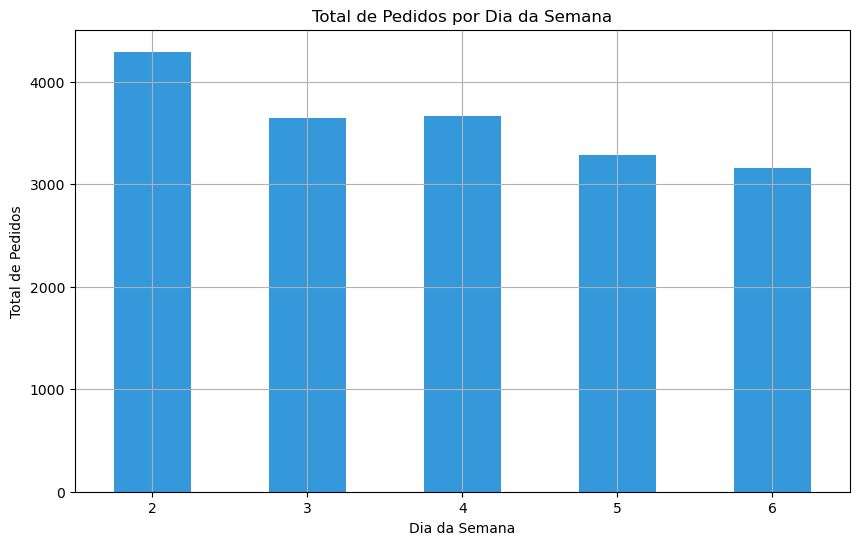

In [8]:
pedidos_por_dia = df.groupby('Day of the week (Monday to Friday)')['Target (Total orders)'].sum()

# Plotar Gráfico de Barras
fig, ax = plt.subplots(figsize=(10, 6))
pedidos_por_dia.plot(kind='bar', color='#3498db', ax=ax)  # Código de cor hexadecimais para um azul sólido
plt.title('Total de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=0)  # Rótulos na vertical
plt.grid(True)
plt.show()

### Legenda do "Dia da Semana"
- **2**: Segunda-feira
- **3**: Terça-feira
- **4**: Quarta-feira
- **5**: Quinta-feira
- **6**: Sexta-feira

De acordo com o grafico acima entendemos que o pico de pedidos acontecem na segunda-feira, tendo variação entre terça e quarta-feira e em sequencia permanece em queda no decorrer da semana.

### Analisando o comportamento do todal de Pedidos no Mês.
O histograma abaixo representa o total de pedidos agrupados por semana do mês. Cada barra colorida em laranja representa a soma dos pedidos para uma semana específica. O eixo horizontal indica as semanas do mês, enquanto o eixo vertical representa o total de pedidos. Este tipo de visualização fornece uma visão geral rápida e intuitiva da distribuição da demanda ao longo das diferentes semanas.

A análise desse histograma pode revelar padrões sazonais, variações semanais consistentes ou eventos excepcionais em semanas específicas. Essa informação é valiosa para entender a dinâmica temporal da demanda e pode orientar estratégias de planejamento e operações logísticas.

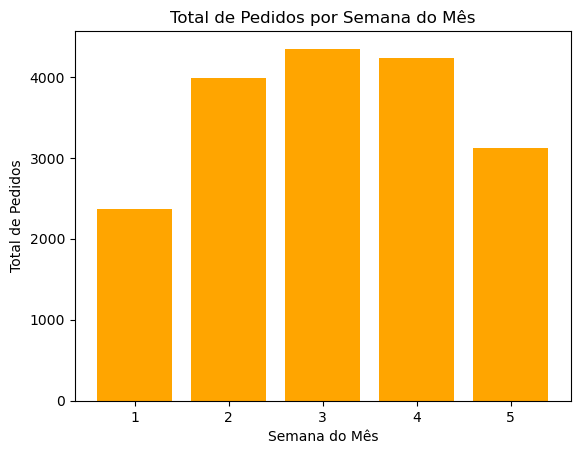

In [9]:
# Agrupar por 'Week' e calcular a soma para 'Target (Total orders)'
total_orders_por_semana = df.groupby('Week of the month (first week, second, third, fourth or fifth week')['Target (Total orders)'].sum()

# Cores diferentes para cada barra
cores = ['orange']

# Criar um histograma com barras coloridas
plt.bar(total_orders_por_semana.index, total_orders_por_semana, color=cores)

# Adicionar rótulos e título
plt.xlabel('Semana do Mês')
plt.ylabel('Total de Pedidos')
plt.title('Total de Pedidos por Semana do Mês')

# Exibir o gráfico
plt.show()

Assim como nos dias da semana, o total de pedidos na semana do mês há pouca variação e tambem ocorre queda até o termino do mês.


## Analisaremos os dados de "Pedido urgente" e "Pedido não urgente".

# Grafico de barras a seguir identificará à ocorrencia dos Pedido Urgente e Não Urgentes.

O gráfico de barras apresenta a soma total de pedidos, discriminando entre pedidos não urgentes e urgentes. Cada barra representa a contagem cumulativa desses dois tipos de pedidos, sendo a barra azul associada aos pedidos não urgentes e a barra vermelha aos pedidos urgentes. A partir do gráfico, é possível visualizar e comparar a contribuição relativa de cada categoria para o total de pedidos, proporcionando uma visão rápida e clara da distribuição da demanda entre pedidos urgentes e não urgentes.

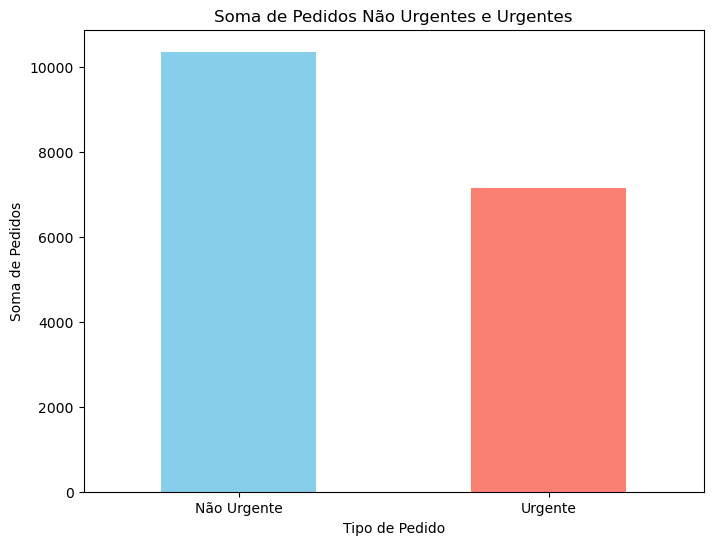

In [10]:
# Obtendo a contagem de 'Non-urgent order' e 'Urgent order'
contagem_pedidos = df[['Non-urgent order', 'Urgent order']].sum()

# Plotando o gráfico de barras
contagem_pedidos.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Soma de Pedidos Não Urgentes e Urgentes')
plt.xlabel('Tipo de Pedido')
plt.ylabel('Soma de Pedidos')
plt.xticks([0, 1], ['Não Urgente', 'Urgente'], rotation=0)
plt.show()

Vemos que pedidos do tipo Não Urgente são mais frequentes em nosso dados, vamos analisar com Grafico de linha o comportamento de cada um.

### Grafico de linha para evolução semanal dos pedidos.

O gráfico de linhas apresenta a evolução semanal dos pedidos, distinguindo entre pedidos não urgentes e urgentes. Cada ponto no gráfico representa o total de pedidos para uma semana específica do mês. A linha azul representa os pedidos não urgentes, enquanto a linha laranja representa os pedidos urgentes. Através desse gráfico, é possível observar como a demanda por pedidos varia ao longo das diferentes semanas do mês, proporcionando insights visuais sobre padrões sazonais ou tendências específicas de urgência ao longo do tempo.

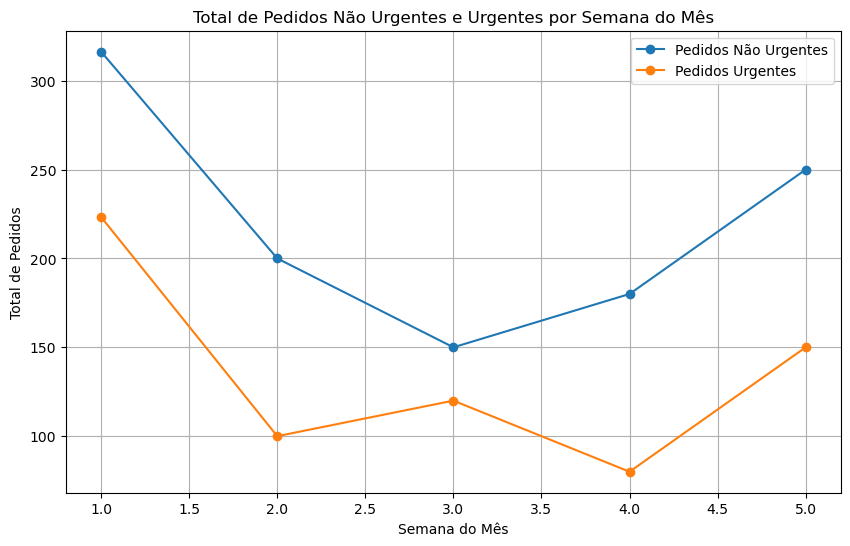

In [11]:
data = {
    'Week of the month (first week, second, third, fourth or fifth week': [1, 2, 3, 4, 5],
    'Non-urgent order': [316.307, 200.0, 150.0, 180.0, 250.0],
    'Urgent order': [223.27, 100.0, 120.0, 80.0, 150.0]
}

df = pd.DataFrame(data)

# Criar um gráfico de linha
plt.figure(figsize=(10, 6))

# Plotar linhas para pedidos não urgentes e urgentes
plt.plot(df['Week of the month (first week, second, third, fourth or fifth week'], df['Non-urgent order'], marker='o', label='Pedidos Não Urgentes')
plt.plot(df['Week of the month (first week, second, third, fourth or fifth week'], df['Urgent order'], marker='o', label='Pedidos Urgentes')

# Adicionar rótulos e título
plt.xlabel('Semana do Mês')
plt.ylabel('Total de Pedidos')
plt.title('Total de Pedidos Não Urgentes e Urgentes por Semana do Mês')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()

# Mapa de calor para identificar a correlação dos dados

O mapa de calor (heatmap) abaixo representa a matriz de correlação entre as variáveis presentes. Cada célula do mapa de calor contém um valor que indica a correlação entre duas variáveis específicas. A intensidade da cor (tons de azul no mapa) representa o grau de correlação, sendo mais intensa para correlações mais fortes.

**Quanto mais próximo o valor estiver de 1, mais forte é a correlação positiva entre as variáveis.
Quanto mais próximo de -1, mais forte é a correlação negativa.**
Um valor próximo de 0 indica uma correlação fraca.
Além disso, o parâmetro annot=True faz com que os valores de correlação sejam exibidos dentro das células correspondentes, facilitando a interpretação. Este tipo de visualização é útil para identificar relações e dependências entre diferentes variáveis no conjunto de dados.

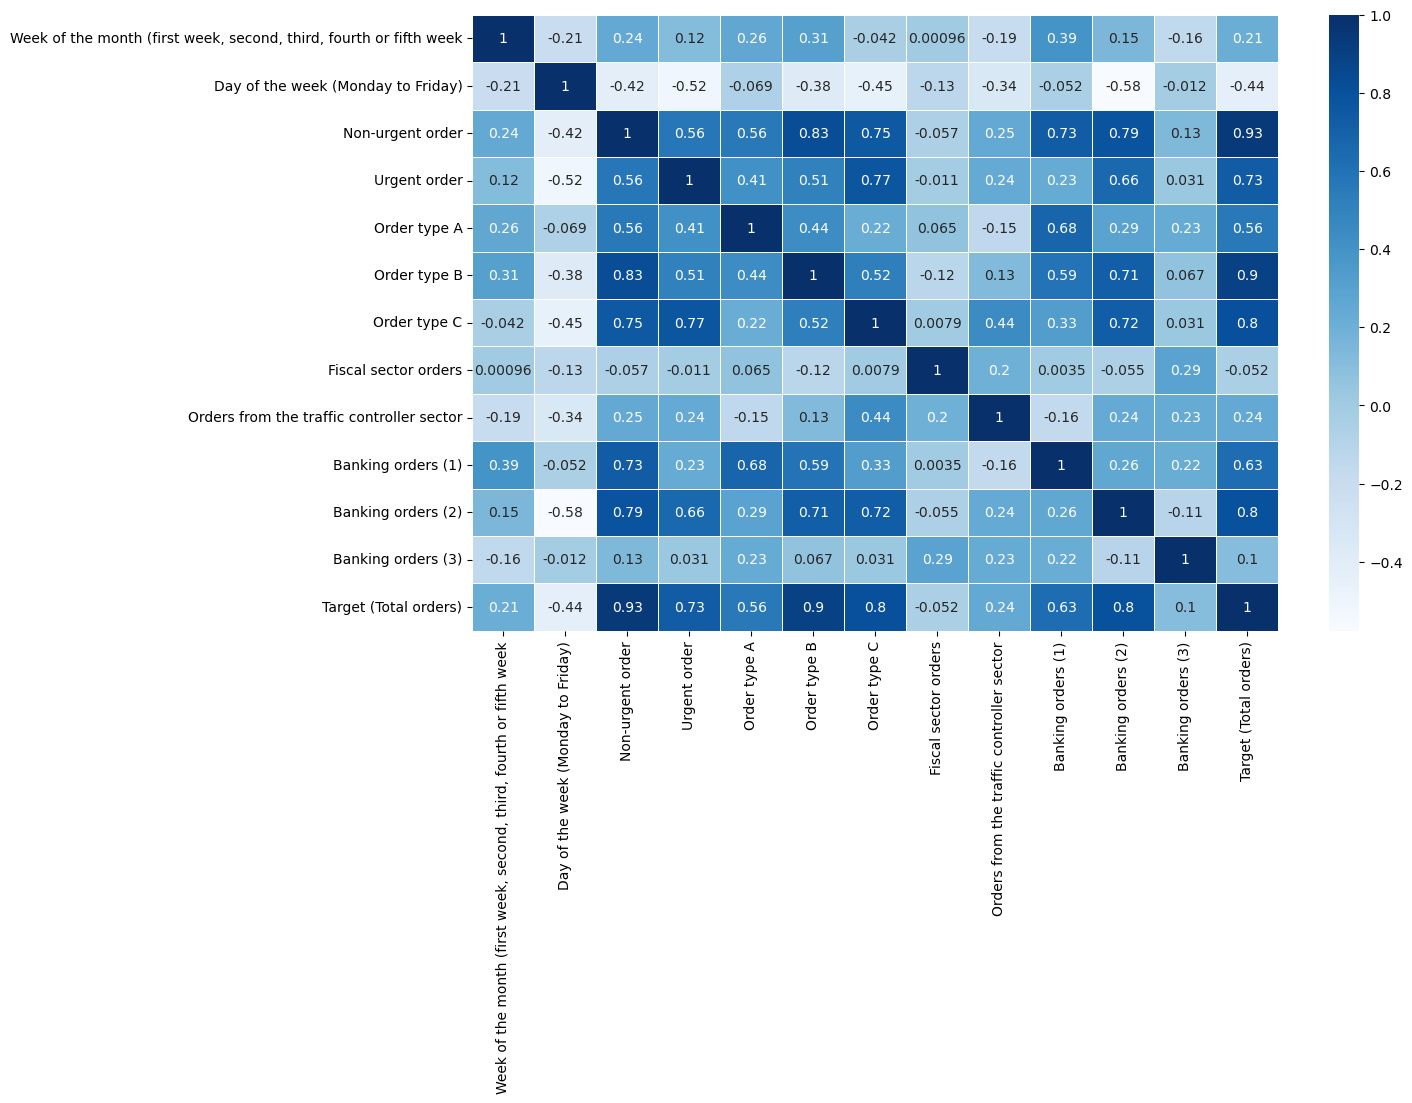

In [12]:
fig, ax = plt.subplots(figsize=(13,8))

_= sns.heatmap(df2.corr(), cmap = 'Blues', linewidth = 0.4, annot = True)

Ao executar o mapa de calor, identificamos 2 casos de correlações para possivel analise, sendo **"Pedido não Urgente(Non-urgent order)"** com **"Total de pedidos(Target (Total orders))"** e **"Tipo de Pedido B(Order type B)"** com **"Total de pedidos(Target (Total orders))".**

## Analise Bivariada


## Grafico de dispersão entre Tipos de Pedido B e Total de Pedidos.

O gráfico apresenta um Scatter Plot, onde cada ponto representa uma observação relacionada ao **total de pedidos Target (Total orders)** no eixo x e ao **tipo de pedido B "Order type B"** no eixo y. Cada ponto no gráfico representa um ponto de dados único do conjunto de dados.

A linha vermelha no gráfico é a linha de regressão, também conhecida como linha de melhor ajuste. Esta linha tenta modelar a relação entre as variáveis, indicando a direção geral da associação entre o total de pedidos e o tipo de pedido B. No caso deste gráfico, a linha de regressão parece inclinar-se positivamente, sugerindo uma correlação positiva entre as duas variáveis; ou seja, à medida que o total de pedidos aumenta, o tipo de pedido B também tende a aumentar.

O gráfico é útil para visualizar padrões e relações entre as variáveis, facilitando a interpretação da possível influência do total de pedidos no comportamento do tipo de pedido B.



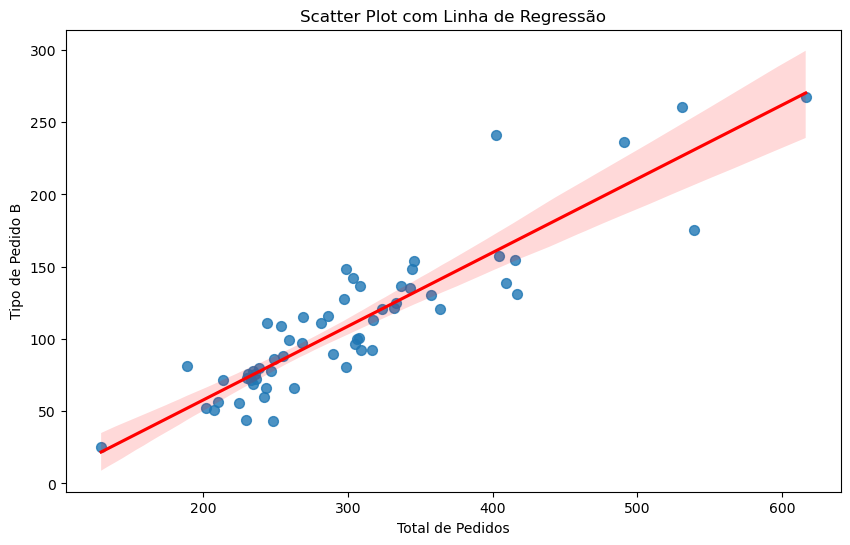

In [13]:
# Criar um Scatter Plot com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='Target (Total orders)', y='Order type B', data=df2, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Adicionar rótulos e título
plt.xlabel('Total de Pedidos')
plt.ylabel('Tipo de Pedido B')
plt.title('Scatter Plot com Linha de Regressão')

# Exibir o gráfico
plt.show()

## Conclusão

Observamos uma clara tendência ascendente. Isso sugere uma relação positiva entre essas duas variáveis, indicando que um aumento na demanda pelo "Tipo de Pedido B" está associado a um aumento correspondente no "Total de Pedidos".

A inclinação positiva da linha de regressão implica que o "Tipo de Pedido B" desempenha um papel significativo na variação do "Total de Pedidos". No entanto, é vital lembrar que correlação não implica causalidade, e há a possibilidade de outros fatores influenciarem essa associação.

## Grafico de dispersão entre Pedidos Não Urgentes e Total de Pedidos.

O Scatter Plot com Linha de Regressão abaixo ilustra a relação entre a quantidade de "Pedidos Não Urgentes" e o "Total de Pedidos". Cada ponto no gráfico representa uma semana específica do mês, onde a posição vertical indica a quantidade de pedidos não urgentes, e a posição horizontal representa o total de pedidos.

A linha de regressão vermelha oferece uma estimativa visual da tendência geral dos dados. Se a linha inclina para cima, indica uma correlação positiva entre as duas variáveis, sugerindo que o aumento nos "Pedidos Não Urgentes" está associado a um aumento no "Total de Pedidos". Por outro lado, se inclinar para baixo, sugere uma correlação negativa.

Este gráfico é útil para entender a natureza da relação entre essas variáveis e identificar padrões ou tendências nos dados.

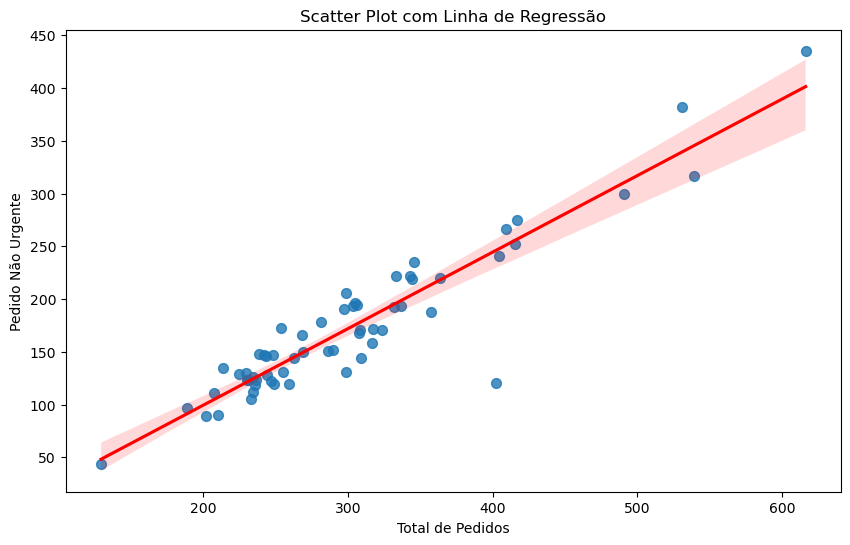

In [14]:
# Scatter Plot com Linha de Regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='Target (Total orders)', y='Non-urgent order', data=df2, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Adicionar rótulos e título
plt.xlabel('Total de Pedidos')
plt.ylabel('Pedido Não Urgente')
plt.title('Scatter Plot com Linha de Regressão')

# Exibir o gráfico
plt.show()

## Conclusão

Podemos concluir que há uma relação positiva moderada entre essas duas variáveis. A inclinação ascendente sugere que, em geral, um aumento na quantidade de "Pedidos Não Urgentes" tambem está associado a um aumento no "Total de Pedidos".

A utilidade da análise de regressão linear reside na capacidade de identificar padrões e tendências nos dados, fornecendo insights sobre a possível associação entre as variáveis. Neste contexto, o gráfico fornece uma visualização eficaz da relação entre "Pedidos Não Urgentes" e o "Total de Pedidos", permitindo uma compreensão mais profunda da dinâmica logística da empresa ao longo do tempo.